In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
type_count = df = pd.read_csv("netflix_titles.csv")
# df.head(5)

In [11]:
df = df.dropna(subset=['type', 'release_year', 'rating', 'country', 'duration'])


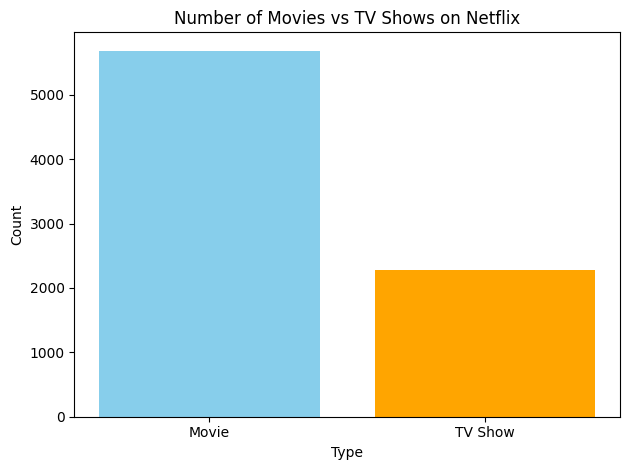

In [19]:
# plt.figure(figsize=(6, 4))
plt.bar(type_count.index.tolist(), type_count.values.tolist(), color=['skyblue', 'orange'])
plt.title("Number of Movies vs TV Shows on Netflix")
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('Movies_Vs_TvShows.png')
plt.show()


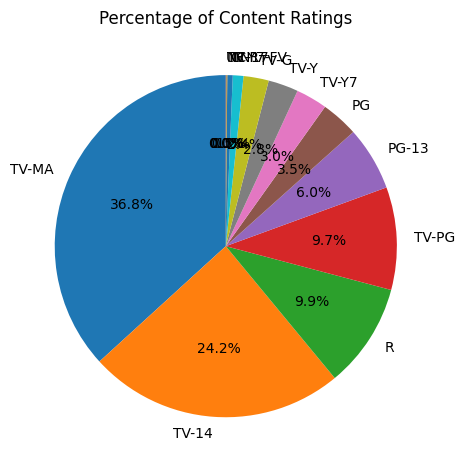

In [21]:
rating_count = df['rating'].value_counts()

# plt.figure(figsize=(4, 6))
plt.pie(rating_count, labels=rating_count.index, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of Content Ratings")
plt.tight_layout()
plt.savefig('Content_Rating.png')
plt.show()

           

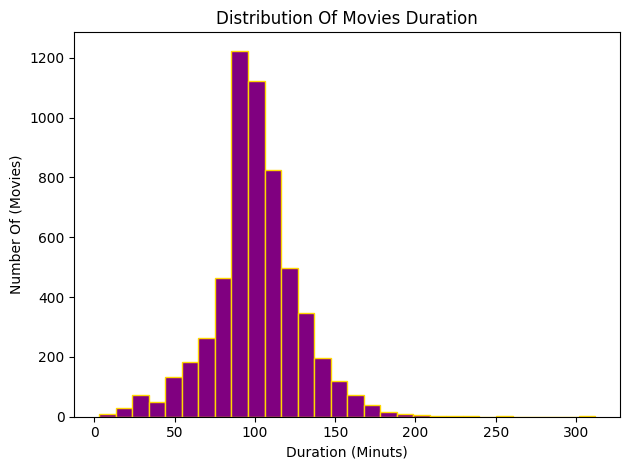

In [26]:
movies_df = df [df['type']== 'Movie'].copy()
movies_df['duration_int'] = movies_df['duration'].str.replace('min','').astype(int)
# plt.figure(figsize=(4,6))
plt.hist(movies_df['duration_int'],bins=30,color='purple',edgecolor='gold')
plt.title('Distribution Of Movies Duration')
plt.xlabel('Duration (Minuts)')
plt.ylabel('Number Of (Movies)')
plt.tight_layout()
plt.savefig('Movies_Duration.png')
plt.show()



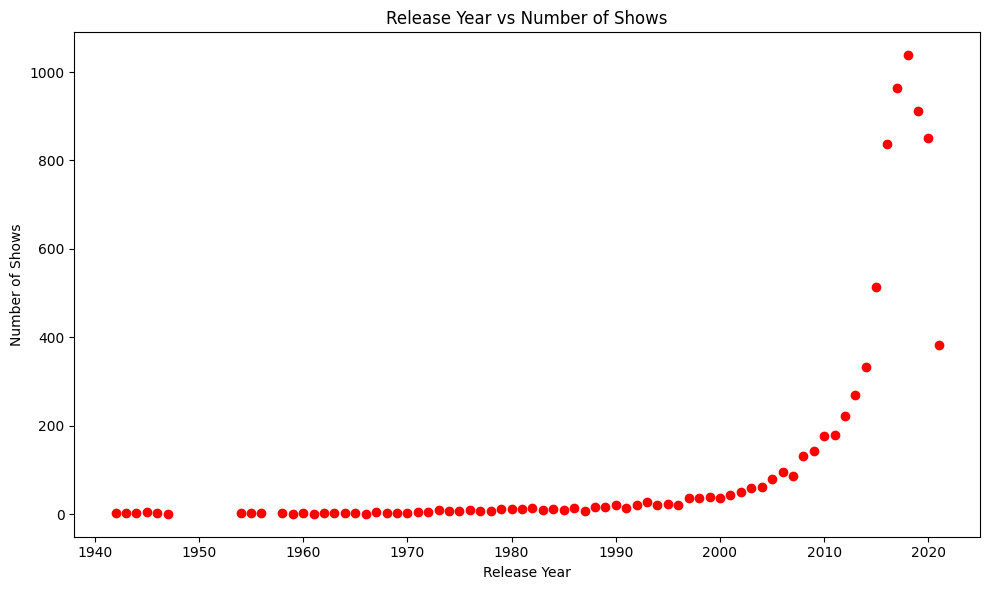

In [29]:
release_count = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.scatter(release_count.index, release_count.values, color='red')
plt.title('Release Year vs Number of Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('Release_Shows.png')
plt.show()



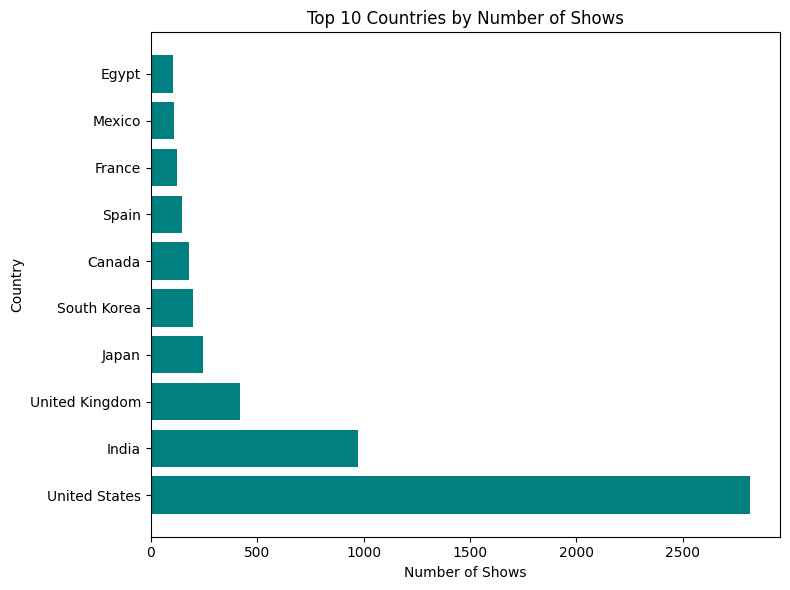

In [31]:
country_count = df['country'].value_counts().head(10)

plt.figure(figsize=(8, 6))
plt.barh(country_count.index, country_count.values, color='teal')
plt.title('Top 10 Countries by Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('Top_Countries.png')
plt.show()


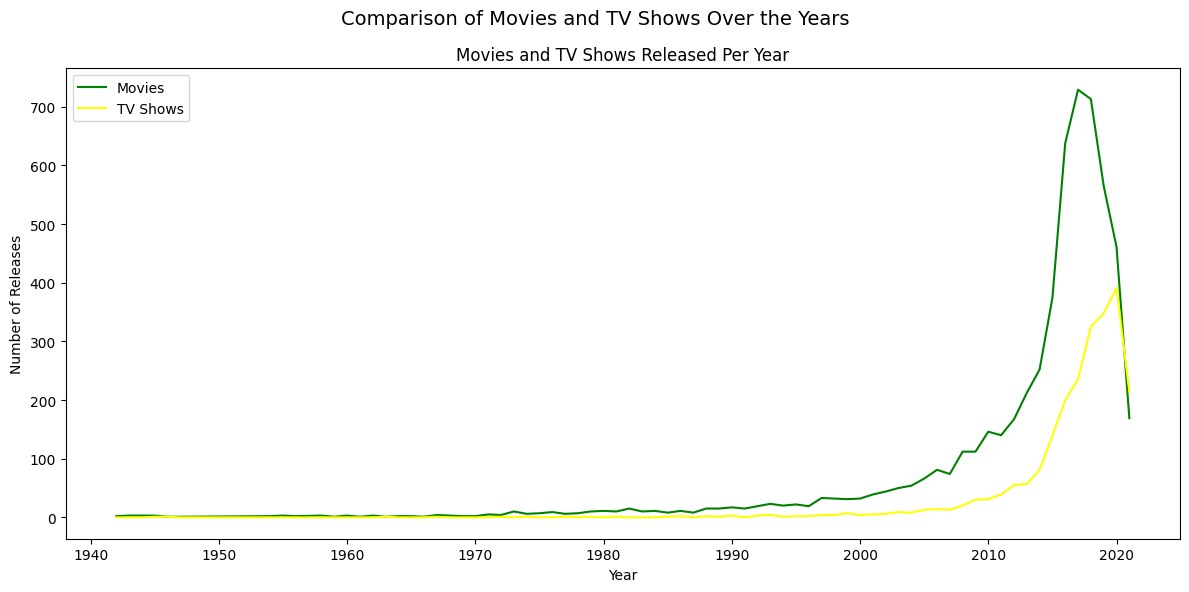

In [35]:
content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(content_by_year.index, content_by_year['Movie'], color='green', label='Movies')
ax.plot(content_by_year.index, content_by_year['TV Show'], color='yellow', label='TV Shows')

ax.set_title('Movies and TV Shows Released Per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Releases')
ax.legend()

fig.suptitle('Comparison of Movies and TV Shows Over the Years', fontsize=14)
plt.tight_layout()
plt.savefig('Movies_TvShows_Comparison.png')
plt.show()
